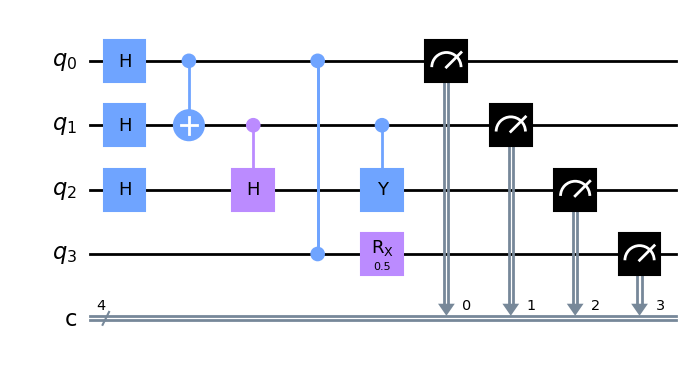

In [1]:
from qiskit import *

qc = QuantumCircuit(4, 4)
qc.h([0, 1, 2])
qc.cx(0, 1)
qc.ch(1,2)
qc.cz(0,3)
qc.cy(1,2)

theta = 0.5
qc.rx(theta, 3)
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

#qc.draw()
qc.draw(output='mpl')

In [2]:
T1s = [50e3, 55e3, 45e3, 60e3]  # T1 times for qubits 0 to 3
T2s = [70e3, 75e3, 65e3, 80e3]  # T2 times for qubits 0 to 3

gate_u1 = 0   # virtual gate
gate_u2 = 50  # single X90 pulse
gate_u3 = 100 # two X90 pulses
gate_cx = 300 # CNOT gate

In [3]:
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
from qiskit.providers.aer.noise.errors import thermal_relaxation_error

# A noise model with thermal relaxation
noise_model = NoiseModel()

for j in range(4):
    noise_model.add_quantum_error(
        thermal_relaxation_error(T1s[j], T2s[j], gate_u1),
        'u1', [j]
    )
    noise_model.add_quantum_error(
        thermal_relaxation_error(T1s[j], T2s[j], gate_u2),
        'u2', [j]
    )
    noise_model.add_quantum_error(
        thermal_relaxation_error(T1s[j], T2s[j], gate_u3),
        'u3', [j]
    )
    
error_prob = 0.01 
cx_error = depolarizing_error(error_prob, 2) 

for j in range(4):
    for k in range(4):
        if j != k: 
            noise_model.add_quantum_error(cx_error, 'cx', [j, k])

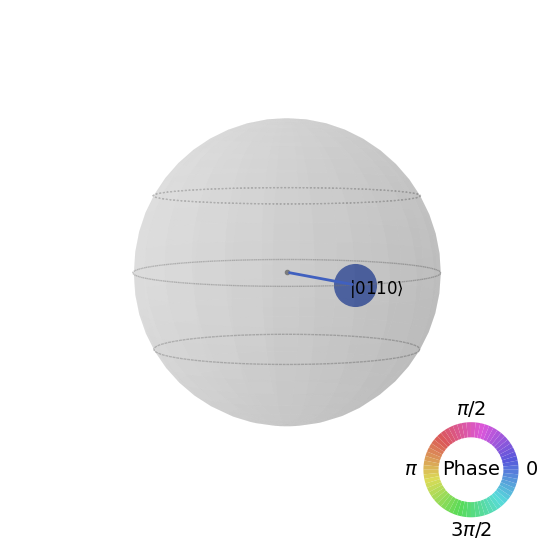

In [4]:
from qiskit import Aer, execute
from qiskit.visualization import plot_state_qsphere

simulator = Aer.get_backend('statevector_simulator')
shots = 1024 

#job = execute(qc, simulator, noise_model=noise_model, shots=shots)
result = execute(qc, simulator,noise_model=noise_model, shots=shots).result()

# Plot QSphere of the final state
statevector = result.get_statevector()
plot_state_qsphere(statevector)

In [5]:
from qiskit import IBMQ
IBMQ.save_account('8d80072b35443387c501e2df30debadc06528cf13920cc417df0106316442fdd6ddfc0afb9091053b1e5c02f0b20081caa54289c1c2698347a97aa52adc205da')
IBMQ.load_account()

configrc.store_credentials:WARNING:2024-04-28 13:07:29,900: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend_name = 'ibm_osaka'
backend = provider.get_backend(backend_name)

In [8]:
backend.status()

In [9]:
job = execute(qc, backend=backend)

Job Status: job has successfully run


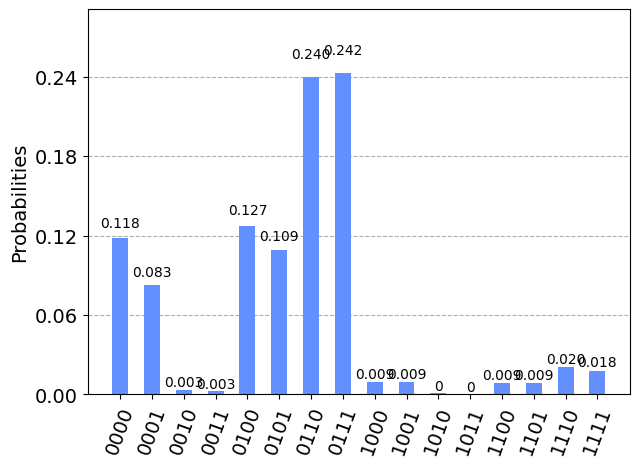

In [10]:
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(qc))